In [2]:
from __future__ import absolute_import, division
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
import pandas as pd
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from scipy import signal




In [33]:
# names = ["cjc", "qst", "smj"]
# PATH = 'output_old/'
PATH = '/home/cjc/Documents/2019Summer/Texadar/data/ljh/'
name=['cjc','gbs','lhy','ljh','lyz','zsy','zzy','sb','wdy','zdy']
gesture=['button','check','circle','double_tap','fast_swipe','finger_rub',
         'finger_slide','hold','slow_swipe','pull','push','rect','round',
         'single_tap']

x=[]
y=[]
X=[]

flag = 0
data_size = 420
data_len = 4000
for i in range(420):
    x.append([])
##-------v2--------
maxlen=0
for name_idx in range(2,3):
    print(names[name_idx])
    for gest_idx in range(len(gesture)):
        for i in range(1,31):
            curr_file = PATH + names[name_idx] + '_'+gesture[gest_idx]+'_'+str(i) +'.txt'
            data = []
            with open(curr_file,'r') as file:
                data = np.loadtxt(file,delimiter=',')
#                 for line in file:
#                     line = line[:-2]
#                     data.append(line.split(","))
#             y.append(name_idx)
#             data = np.array(data)
           
            data = data.reshape(1,-1)[0]
            data = data[352:]
            b, a = signal.butter(8, 0.20, 'lowpass')
            sig = signal.filtfilt(b, a, data)#data为要过滤的信号
            b, a = signal.butter(8, 0.20, 'highpass')
            noise = signal.filtfilt(b, a, data)
#             print(data.shape)
    #         if(maxlen<len(data)):
    #             maxlen = len(data)
    #         print(maxlen)
    
            x[gest_idx*30+i-1]=sig[:]

ljh


In [126]:
x_norm = []
for i in range(420):
    x_norm.append([])
for i in range(420):
    tempptp = np.ptp(x[i])
    tempmin = np.min(x[i])
    tempmax = np.max(x[i])
    tempstd = np.std(x[i])
    x_norm[i] = (x[i]-np.min(x[i]))*50/np.std(x[i])

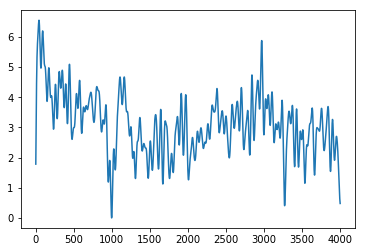

In [120]:
i=232
plt.plot((x[i]-np.min(x[i]))/np.std(x[i]))

In [127]:
ptplist = []
for i in range(len(x)):
    ptplist.append(np.ptp(x_norm[i]))
    
#     if(np.ptp(x[i])>1000):
#         print(np.ptp(x[i]))
#         plt.figure()
#         plt.plot(x[i])
#         plt.show()
# plt.plot(signal.detrend(x[11*30+1]))
# plt.plot(x[11*30+1])


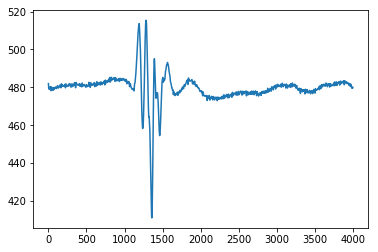

In [38]:
plt.plot(x[4*30+9])

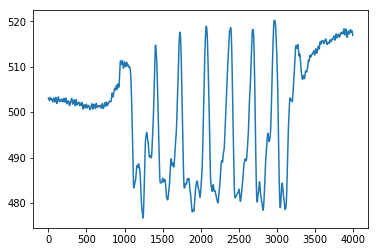

In [30]:
plt.plot(x[5*30+8])

In [130]:









np.mean(ptplist)

304.28612431904446

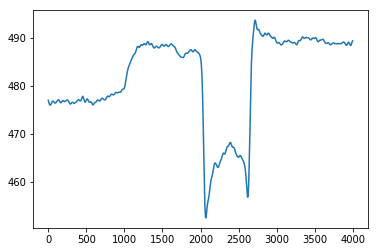

In [77]:
plt.plot(x[2])

In [137]:
y = []
for i in range(1):
    for j in range(14):
        for z in range(30):
            y.append(j)
len(y)
t = []
for j in range(data_len):
    t.append(j)
len(t)

4000

In [131]:
x = x_norm
from tsfresh import extract_features
for i in range(420):
    temp = np.array(x[i]).reshape(-1,1)
    tempt = np.array(t).reshape(-1,1)
    res = np.append(tempt,temp,axis=1)
#     print(res.shape)
    tempdf = pd.DataFrame(data=res,
                index=[j for j in range(len(t)*i,len(t)*i+len(t))],
                columns=['time','v'])
    tempdf.insert(0, 'id',[i]*len(t))
#     print(tempdf)
    if(i==0):
        X = tempdf
    else:
        X = X.append(tempdf)
# features_1000 = extract_features(X, column_id="id", column_sort="time")
# features_filtered_direct = extract_relevant_features(res, pd.Series([1]), column_id='ID', column_sort='time')

In [132]:
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
extracted_features = extract_features(X, column_id='id', column_sort='time', default_fc_parameters=EfficientFCParameters())

Feature Extraction: 100%|██████████| 15/15 [06:42<00:00, 17.97s/it]


In [133]:
extracted_features.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/extracted_features_trial5.csv")

In [42]:
extracted_features

variable,v__abs_energy,v__absolute_sum_of_changes,"v__agg_autocorrelation__f_agg_""mean""__maxlag_40","v__agg_autocorrelation__f_agg_""median""__maxlag_40","v__agg_autocorrelation__f_agg_""var""__maxlag_40","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","v__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","v__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,v__symmetry_looking__r_0.9,v__symmetry_looking__r_0.9500000000000001,v__time_reversal_asymmetry_statistic__lag_1,v__time_reversal_asymmetry_statistic__lag_2,v__time_reversal_asymmetry_statistic__lag_3,v__value_count__value_-1,v__value_count__value_0,v__value_count__value_1,v__variance,v__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,9.315735e+08,249.726934,0.934771,0.938455,0.002212,453.261921,0.567135,0.043981,0.003066,455.363560,...,1.0,1.0,-2.687889e+03,-5.373279e+03,-8.061317e+03,0.0,0.0,0.0,9.635853e+01,1.0
1,1.019825e+09,232.320110,0.946175,0.953176,0.001761,494.173216,-0.645932,-0.045855,0.002601,495.368588,...,1.0,1.0,-2.476020e+03,-4.975976e+03,-7.503002e+03,0.0,0.0,0.0,8.383940e+01,1.0
2,1.265264e+09,10541.760120,0.225194,0.039018,0.188659,573.650165,-0.152381,-0.309050,0.096217,733.566882,...,1.0,1.0,-2.150698e+04,-1.126089e+04,2.213165e+04,0.0,0.0,0.0,4.501089e+04,1.0
3,9.972140e+08,161.461306,0.963578,0.968030,0.000839,473.226321,0.414844,0.025599,0.002695,474.006839,...,1.0,1.0,9.018140e+01,2.855915e+02,5.813006e+02,0.0,0.0,0.0,6.278180e+01,1.0
4,1.008578e+09,163.376546,0.975166,0.979470,0.000436,479.767753,0.092627,0.007761,0.004005,480.763588,...,1.0,1.0,-1.508094e+03,-2.965806e+03,-4.376651e+03,0.0,0.0,0.0,1.140732e+02,1.0
5,9.797967e+08,181.437922,0.949038,0.957253,0.001705,477.456815,-0.288002,-0.012963,0.002069,478.018598,...,1.0,1.0,-1.948946e+03,-3.896088e+03,-5.844443e+03,0.0,0.0,0.0,3.426348e+01,1.0
6,9.878549e+08,183.678621,0.979111,0.982747,0.000304,484.488101,-0.462616,-0.036650,0.003371,484.878607,...,1.0,1.0,-2.209151e+03,-4.411869e+03,-6.612963e+03,0.0,0.0,0.0,1.020933e+02,1.0
7,1.009742e+09,125.737100,0.996371,0.997676,0.000017,481.122531,0.038907,0.002811,0.003466,481.506336,...,1.0,1.0,1.114925e+03,2.200395e+03,3.258598e+03,0.0,0.0,0.0,8.367205e+01,1.0
8,9.785686e+08,151.504982,0.974837,0.978084,0.000392,477.234303,-0.281380,-0.013395,0.002193,477.511738,...,1.0,1.0,1.239223e+03,2.461371e+03,3.664728e+03,0.0,0.0,0.0,3.650179e+01,1.0


In [138]:
y =  np.array(y)

In [139]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [140]:
features_filtered.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/features_filtered_trial5.csv")